### 0. Import packages.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
import string
import torch
from torch import nn
from torch.utils import data
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import pickle
import time
from PIL import Image
import re

### 1. Write a Python function to sum all the numbers in a list.

In [2]:
def sum_list(x):
    s = 0
    for i in x:
        s = s + i
    return s

In [3]:
x = [1, 2, 3]
sum_list(x)

6

### 2. Write a Python function that takes a list and returns a new list with unique elements of the ﬁrst list.

In [4]:
def unique_element(x):
    return list(set(x))

In [5]:
x = [1, 2, 3, 3, 3, 3, 4, 5]
unique_element(x)

[1, 2, 3, 4, 5]

### 3. Write a Python function that checks whether a passed string is palindrome or not.

A palindrome is a word, phrase, or sequence that reads the same backward as forward. For example, both “madam” and “nurses run” are palindromes.

In [6]:
def check_palindrome(x):
    x_new = x.replace(' ', '') # delete space
    for punc in string.punctuation: # delete punctuation
        x_new = x_new.replace(punc, '')
    return x_new[::-1] == x_new

In [7]:
check_palindrome('madam')
check_palindrome('nurses run')
check_palindrome('nurses, run!')
check_palindrome('maadam')

True

True

True

False

### 4. Write a NumPy program to ﬁnd the real and imaginary parts of an array of complex numbers.

In [8]:
def detect_complex(x):
    complex_list = []
    for i in x:
        complex_list.append([i.real, i.imag])
    return complex_list

In [9]:
x = [1.00000000+0.j, 0.70710678+0.70710678j]
y = [2+3j, 3+4j, 4+5j]
detect_complex(x)
detect_complex(y)

[[1.0, 0.0], [0.70710678, 0.70710678]]

[[2.0, 3.0], [3.0, 4.0], [4.0, 5.0]]

### 5. Write a Python program to add two binary numbers.

In [10]:
def add_binary(x, y):
    s = list(str(int(x) + int(y))[::-1]) + ['0']
    for i in range(len(s) - 1):
        if int(s[i]) > 1:
            s[i + 1] = str(int(s[i + 1]) + 1)
            s[i] = str(int(s[i]) - 2)
    if s[-1] == 0:
        s.pop()
    return ''.join(s[::-1])

In [11]:
add_binary('11','1')
add_binary('1111','111')

'100'

'10110'

### 6. Linked List

You are given two non-empty linked lists representing two non-negative integers. The digits are stored in reverse order and each of their nodes contain a single digit. Add the two numbers and return it as a linked list. You may assume the two numbers do not contain any leading zero, except the number 0 itself.

In [12]:
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

In [13]:
def trans_linked_list(x):
    if isinstance(x, int):
        x = str(x)
    x_list = list(x)
    if len(x_list) == 1:
        return ListNode(int(x))
    else:
        linked_list = ListNode(int(x_list.pop()))
        linked_list.next = trans_linked_list(''.join(x_list))
    return linked_list

def output_linked_list(x, bracket = True):
    x_list = []
    while x:
        x_list.append(str(x.val))
        x = x.next
    x_num = int(''.join(x_list[::-1]))
    out = '->'.join(x_list)
    if bracket:
        out = '(' + out + ')'
    return x_num, out

def add_two_int(x: ListNode, y: ListNode) -> ListNode:
    x_num, x_out = output_linked_list(x)
    y_num, y_out = output_linked_list(y)
    s_num = x_num + y_num
    s_trans = trans_linked_list(s_num)
    s_num, s_out = output_linked_list(s_trans, False)
    print('+'.join([x_out, y_out]))
    print(s_out)
    return s_trans

In [14]:
x = trans_linked_list(342)
y = trans_linked_list(465)
s = add_two_int(x, y)

(2->4->3)+(5->6->4)
7->0->8


In [15]:
output_linked_list(x), output_linked_list(y)
type(s), output_linked_list(s)

((342, '(2->4->3)'), (465, '(5->6->4)'))

(__main__.ListNode, (807, '(7->0->8)'))

### 7. Implement bubble sort.

In [16]:
def bubble_sort(x):
    change = True
    while change:
        change = False
        for i in range(1, len(x)):
            if x[i] < x[i - 1]:
                x[i], x[i - 1] = x[i - 1], x[i]
                change = True
    return x

In [17]:
bubble_sort([5,2,4,6,3,2,8,1,0,2,7])

[0, 1, 2, 2, 2, 3, 4, 5, 6, 7, 8]

### 8. Implement merge sort.

In [18]:
def merge(left, right):
    out = []
    while left and right:
        if left[0] < right[0]:
            out.append(left.pop(0))
        else:
            out.append(right.pop(0))
    if left:
        out += left
    if right:
        out += right
    return out

def merge_sort(x):
    if len(x) == 1:
        out = x
    else:
        x_left = x[:int(len(x) / 2)]
        x_right = x[int(len(x) / 2):]
        out = merge(merge_sort(x_left), merge_sort(x_right))
    return out

In [19]:
merge_sort([5,2,4,6,3,2,8,1,0,2,7])

[0, 1, 2, 2, 2, 3, 4, 5, 6, 7, 8]

### 9. Implement quick sort.

In [20]:
def quick_sort(x):
    if len(x) == 1:
        out = x
    elif len(x) == 2:
        if x[0] > x[1]:
            x[0], x[1] = x[1], x[0]
        out = x
    else:
        rf = 0
        i = 0
        j = len(x) - 1
        while i < j:
            for k in range(j, rf, -1):
                if x[k] < x[rf]:
                    x[rf], x[k] = x[k], x[rf]
                    rf = k
                    break
            j = k
            for k in range(i, rf):
                if x[k] > x[rf]:
                    x[rf], x[k] = x[k], x[rf]
                    rf = k
                    break
            i = k
        if rf == 0:
            out = [x[rf]] + quick_sort(x[(rf + 1):])
        elif rf == len(x) - 1:
            out = quick_sort(x[:rf]) + [x[rf]]
        else:
            out = quick_sort(x[:rf]) + [x[rf]] + quick_sort(x[(rf + 1):])
    return out

In [21]:
quick_sort([5,2,4,6,3,2,8,1,0,2,7])

[0, 1, 2, 2, 2, 3, 4, 5, 6, 7, 8]

### 10. Implement shell sort.

In [22]:
def insertion_sort(x):
    for i in range(1, len(x)):
        k = i
        for j in range(i - 1, -1, -1):
            if x[k] < x[j]:
                x.insert(j, x.pop(k))
                k = j
    return x

def shell_sort(x, interval):
    if interval == 1:
        out = x
    else:
        interval = int(interval / 2)
        for i in range(len(x) - interval):
            x[i::interval] = insertion_sort(x[i::interval])
        out = shell_sort(x, interval)
    return out

In [23]:
shell_sort([5,2,4,6,3,2,8,1,0,2,7], 11)

[0, 1, 2, 2, 2, 3, 4, 5, 6, 7, 8]

### 11. Implement linear regression model and use autograd to optimize it by Pytorch.

In [24]:
def load_data(data_arrays, batch_size, is_train = True):
    dataset = data.TensorDataset(*data_arrays)
    return (data.DataLoader(dataset, batch_size, shuffle = is_train))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std = 0.01)

def linear_reg(features, labels, loss, epoch_num, batch_size, lr):
    net = nn.Sequential(nn.Linear(len(features[0]), 1))
    net.apply(init_weights)
    trainer = torch.optim.SGD(net.parameters(), lr = lr)
    data_iter = load_data((features, labels), batch_size)
    
    for epoch in range(epoch_num):
        for X, y in data_iter:
            l = loss(net(X), y)
            trainer.zero_grad()
            l.backward()
            trainer.step()
        l = loss(net(features), labels)
        print(f'epoch {epoch}, loss {l:f}')
    
    return net

In [25]:
def generate_reg_data(w, b):
    features = torch.normal(0, 1, (1000, 5))
    labels = torch.matmul(features, w) + b
    labels += torch.normal(0, 0.01, labels.shape)
    labels = labels.reshape(-1, 1)
    return features, labels

In [26]:
w_true = torch.normal(0, 2, (1, 5))[0]
b_true = 0.5
w_true
b_true
features, labels = generate_reg_data(w_true, b_true)
loss = nn.MSELoss()
net_trained = linear_reg(features, labels, loss, 5, 20, 0.03)
net_trained[0].weight.data
net_trained[0].bias.data

tensor([ 1.1585, -1.1266,  0.2161,  0.1560,  1.2473])

0.5

epoch 0, loss 0.006389
epoch 1, loss 0.000104
epoch 2, loss 0.000094
epoch 3, loss 0.000093
epoch 4, loss 0.000094


tensor([[ 1.1587, -1.1257,  0.2168,  0.1561,  1.2477]])

tensor([0.5001])

### 12. Implement logistic regression model and use autograd to optimize it by Pytorch.

In [27]:
def logistic_reg(features, labels, loss, epoch_num, batch_size, lr):
    net = nn.Sequential(nn.Linear(len(features[0]), 1), nn.Sigmoid())
    net.apply(init_weights)
    trainer = torch.optim.SGD(net.parameters(), lr = lr)
    data_iter = load_data((features, labels), batch_size)
    
    def accuracy(y_hat, y):
        acc = ((y_hat > 0.5) == y).sum()
        return float(acc / len(y))

    for epoch in range(epoch_num):
        for X, y in data_iter:
            l = loss(net(X), y)
            trainer.zero_grad()
            l.backward()
            trainer.step()
        l = loss(net(features), labels)
        acc = accuracy(net(features), labels)
        if epoch % 100 == 0:
            print(f'epoch {epoch}, loss {l:.4f}, accuracy {acc*100:.2f}%')
    
    return net

In [28]:
def generate_class_data(neg = 0):
    x1 = torch.rand(500, 5) * 5 + 2
    x0 = torch.rand(500, 5) * 3 - 5
    features = torch.cat((x1, x0)) + torch.randn(1000, 1) * 2
    labels = torch.cat((torch.tensor([1] * 500), torch.tensor([neg] * 500)))
    labels = labels.reshape(-1, 1).float()
    return features, labels

In [29]:
features, labels = generate_class_data()
loss = nn.BCELoss()
net_trained = logistic_reg(features, labels, loss, 500, 20, 0.001)

epoch 0, loss 0.2846, accuracy 96.60%
epoch 100, loss 0.0691, accuracy 97.20%
epoch 200, loss 0.0668, accuracy 97.10%
epoch 300, loss 0.0657, accuracy 97.20%
epoch 400, loss 0.0650, accuracy 97.20%


### 13. Implement linear SVM model for binary classification task and use autograd to optimize it by Pytorch.

Hint: you may use the loss of $\sum \max [0, 1 − y (wx + b)]$.

In [30]:
def svm_loss_1(y_hat, y):
    s = 1 - y * y_hat
    return ((s > 0) * s).sum()

def linear_svm_1(features, labels, loss, epoch_num, batch_size, lr):
    net = nn.Sequential(nn.Linear(len(features[0]), 1))
    net.apply(init_weights)
    trainer = torch.optim.SGD(net.parameters(), lr = lr)
    data_iter = load_data((features, labels), batch_size)

    def accuracy(y_hat, y):
        acc = (y * y_hat > 0).sum()
        return float(acc / len(y))
    
    for epoch in range(epoch_num):
        for X, y in data_iter:
            l = loss(net(X), y)
            trainer.zero_grad()
            l.backward()
            trainer.step()
        l = loss(net(features), labels)
        acc = accuracy(net(features), labels)
        if epoch % 100 == 0:
            print(f'epoch {epoch}, loss {l:.4f}, accuracy {acc*100:.2f}%')
    
    return net

In [41]:
features, labels = generate_class_data(-1)
loss = svm_loss_1
net_trained = linear_svm_1(features, labels, loss, 500, 20, 0.001)

epoch 0, loss 74.4712, accuracy 97.40%
epoch 100, loss 69.3885, accuracy 97.60%
epoch 200, loss 69.4126, accuracy 97.60%
epoch 300, loss 69.3878, accuracy 97.60%
epoch 400, loss 69.3735, accuracy 97.60%


### 14. Add a Frobenius norm penalty for the weight $w$ in your SVM model by two different ways:

(1) Use a pytorch function to calculate the norm.

In [33]:
def svm_loss_2(y_hat, y, w, alpha):
    s = 1 - y * y_hat
    s = ((s > 0) * s).sum()
    return s + alpha * torch.norm(w)

(2) Implement the code by yourself.

In [34]:
def svm_loss_3(y_hat, y, w, alpha):
    s = 1 - y * y_hat
    s = ((s > 0) * s).sum()
    return s + alpha * (w ** 2).sum() ** 0.5

In [35]:
def linear_svm_2(features, labels, loss, epoch_num, batch_size, lr):
    net = nn.Sequential(nn.Linear(len(features[0]), 1))
    trainer = torch.optim.SGD(net.parameters(), lr = lr)
    data_iter = load_data((features, labels), batch_size)

    def accuracy(y_hat, y):
        acc = (y * y_hat > 0).sum()
        return float(acc / len(y))
    
    for epoch in range(epoch_num):
        for X, y in data_iter:
            l = loss(net(X), y, net[0].weight.data, 2)
            trainer.zero_grad()
            l.backward()
            trainer.step()
        l = loss(net(features), labels, net[0].weight.data, 2)
        acc = accuracy(net(features), labels)
        if epoch % 100 == 0:
            print(f'epoch {epoch}, loss {l:.4f}, accuracy {acc*100:.2f}%')
    
    return net

In [44]:
loss = svm_loss_2
net_trained = linear_svm_2(features, labels, loss, 500, 20, 0.001)

epoch 0, loss 110.2625, accuracy 95.80%
epoch 100, loss 70.4370, accuracy 97.50%
epoch 200, loss 70.4564, accuracy 97.50%
epoch 300, loss 70.4144, accuracy 97.50%
epoch 400, loss 70.4552, accuracy 97.50%


In [45]:
loss = svm_loss_3
net_trained = linear_svm_2(features, labels, loss, 500, 20, 0.001)

epoch 0, loss 101.9124, accuracy 95.70%
epoch 100, loss 70.4587, accuracy 97.60%
epoch 200, loss 70.4329, accuracy 97.60%
epoch 300, loss 70.4073, accuracy 97.60%
epoch 400, loss 70.4213, accuracy 97.60%


### 15. Learn how to use linear regression, logistic regression, and SVM by scikit-learn.

(1) Linear Regression.

In [37]:
features, labels = generate_reg_data(w_true, b_true)
linear = LinearRegression()
linear.fit(features, labels)
print(f'Linear Regression, R2 {linear.score(features, labels)*100:.2f}%')

LinearRegression()

Linear Regression, R2 100.00%


(2) Logistic Regression.

In [38]:
features, labels = generate_class_data()
labels = labels.reshape(-1)
logistic = LogisticRegression()
logistic.fit(features, labels)
print(f'Logistic Regression, accuracy {logistic.score(features, labels)*100:.2f}%')

LogisticRegression()

Logistic Regression, accuracy 96.90%


(3) SVM.

In [39]:
svc = LinearSVC()
svc.fit(features, labels)
print(f'SVM, accuracy {svc.score(features, labels)*100:.2f}%')

LinearSVC()

SVM, accuracy 97.00%


### 16. Download CIFAR-10 dataset and visualize some of its images.

In [47]:
cifar_data_path = 'data/cifar10'
trans_1 = transforms.ToTensor()
cifar_train = torchvision.datasets.CIFAR10(cifar_data_path, train=True, transform=trans_1, download=True)
cifar_test = torchvision.datasets.CIFAR10(cifar_data_path, train=False, transform=trans_1, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [41]:
def get_cifar_labels(labels):
    text_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']
    return [text_labels[int(i)] for i in labels]

In [42]:
def show_cifar(imgs, num_rows, num_cols, titles, scale=1.5):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        img = img.reshape(-1, 1024)
        image = np.zeros((32, 32, 3))
        image[:, :, 0] = img[0, :].reshape(32, 32)
        image[:, :, 1] = img[1, :].reshape(32, 32)
        image[:, :, 2] = img[2, :].reshape(32, 32)
        ax.imshow(image)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_title(titles[i])
    plt.show()

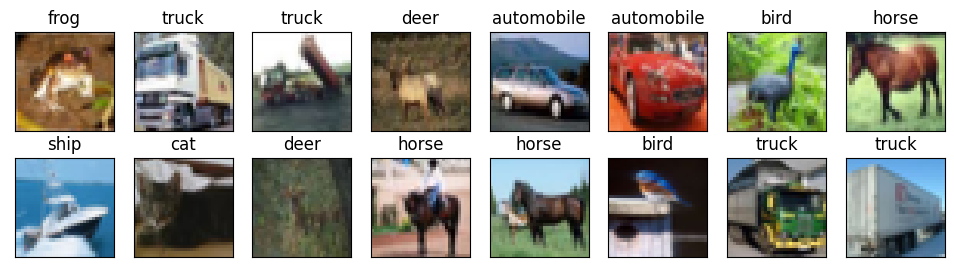

In [43]:
X, y = next(iter(data.DataLoader(cifar_train, batch_size = 16)))
show_cifar(X.reshape(16, 3, 32, 32), 2, 8, get_cifar_labels(y))

### 17. Write a dataset class for loading CIFAR-10. Make sure it could be transferred to Pytorch Dataloader. 

The class should meet the following requirements: (1) Inherit pytorch’s DataSet class; (2) Load the image file and save in proper way; (3) Override \_\_getitem__ and \_\_len__ methods.

In [44]:
class cifar_loader(data.dataset.Dataset):
    
    def __init__(self, path, train = True):
        self.path = path
        self.train = train
        data = []
        labels = []
        if self.train:
            image_list = [self.path + '/data_batch_' + str(i) for i in range(1,6)]
        else:
            image_list = [self.path + '/test_batch']
        for image in image_list:
            with open(image, 'rb') as f:
                image_dict = pickle.load(f, encoding='bytes')
                data += [image_dict[b'data']]
                labels += [image_dict[b'labels']]
        data = np.concatenate(data)
        labels = np.concatenate(labels)
        self.data = np.reshape(data,[-1, 3, 32, 32]) / 255
        self.labels = labels
    
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [45]:
cifar_path = 'data/cifar10/cifar-10-batches-py'
cifar_train_1 = cifar_loader(cifar_path, train = True)
cifar_test_1 = cifar_loader(cifar_path, train = False)

In [46]:
cifar_train_1.data.shape, cifar_test.data.shape

((50000, 3, 32, 32), (10000, 32, 32, 3))

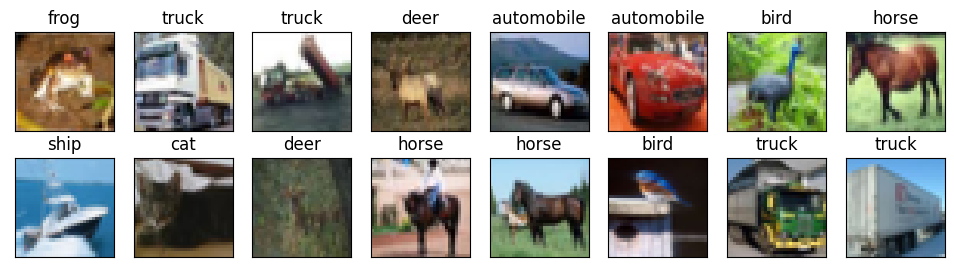

In [47]:
X, y = next(iter(data.DataLoader(cifar_train_1, batch_size = 16)))
show_cifar(X, 2, 8, get_cifar_labels(y))

### 18. Read and learn how to use *torchvision.transforms* to transform images.

In [48]:
trans_2 = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])
cifar_train_trans = torchvision.datasets.CIFAR10(cifar_data_path, train = True, transform = trans_2, download = True)

Files already downloaded and verified


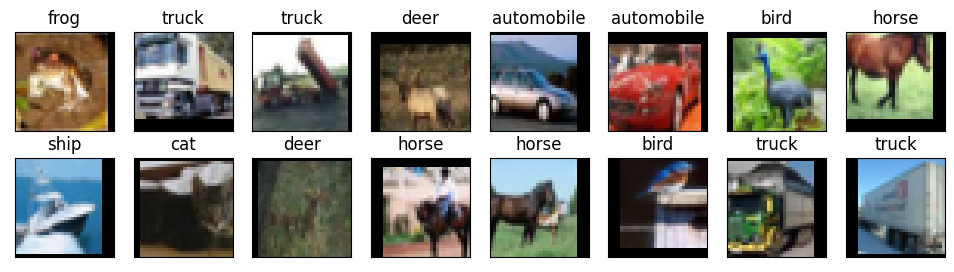

In [49]:
X, y = next(iter(data.DataLoader(cifar_train_trans, batch_size = 16)))
show_cifar(X.reshape(16, 3, 32, 32), 2, 8, get_cifar_labels(y))

### 19. Run one epoch for loading CIFAR-10 with Pytorch Dataloader and test the loading time of different *batch_size* (1, 4, 64, 1024), different *num_workers* (0,1,4,16), and whether use *pin_memory* or not.

Set the default values of *batch_size*, *num_workers*, *pin_memory* respectively as 4, 0 and `True`.

In [6]:
def load_one_epoch(batch_size = 64, num_workers = 0, pin_memory = True):
    _, _ = next(iter(data.DataLoader(cifar_train,
                                     batch_size = batch_size,
                                     num_workers = num_workers,
                                     pin_memory = pin_memory)))

- With *batch_size* increasing and other parameters fixed, the loading time also increases.

In [7]:
%timeit load_one_epoch(batch_size = 1)
%timeit load_one_epoch(batch_size = 4)
%timeit load_one_epoch(batch_size = 64)
%timeit load_one_epoch(batch_size = 1024)

90.7 µs ± 3.29 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
220 µs ± 1.92 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.5 ms ± 28.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
41.6 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


- With *pin_memory* open and other parameters fixed, the loading time decreases.

In [8]:
%timeit -n 1000 load_one_epoch(pin_memory = False)
%timeit -n 1000 load_one_epoch(pin_memory = True)

2.48 ms ± 8.88 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.45 ms ± 16 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


- With *num_workers* increasing and other parameters fixed, the loading time also increases.

In [9]:
%timeit load_one_epoch(num_workers = 0)
%timeit load_one_epoch(num_workers = 1)
%timeit load_one_epoch(num_workers = 4)
%timeit load_one_epoch(num_workers = 16)

2.53 ms ± 31.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.02 s ± 14.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.79 s ± 20.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
15.4 s ± 286 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 20. Calculate the mean and std of CIFAR-10’ training set within each RGB channel.

In [48]:
train_dataloader = data.DataLoader(cifar_train, batch_size = 50000)
for X, _ in train_dataloader:
    train_mean = np.mean(X.numpy(), axis = (0, 2, 3)) * 255
    train_std = np.std(X.numpy(), axis = (0, 2, 3)) * 255
    print('R: mean: {:.4f}, std: {:.4f}'.format(train_mean[0], train_std[0]))
    print('G: mean: {:.4f}, std: {:.4f}'.format(train_mean[1], train_std[1]))
    print('B: mean: {:.4f}, std: {:.4f}'.format(train_mean[2], train_std[2]))

R: mean: 125.3072, std: 62.9934
G: mean: 122.9505, std: 62.0885
B: mean: 113.8653, std: 66.7048


### 21. Image to character painting

(a) Target: Converting the RGB color image to character painting with Python code.
- Character painting is a combination of a series of characters. We can think of characters as relatively large pixels. A character can represent a color. The more types of characters, the more colors can be represented, and the picture will be more hierarchical sense

(b) Requirements
- Python 3.5
- pillow 5.1.0

(c) Method
- Use PIL (pillow) to get the input picture
- Use the following formula to map RGB values to gray values (note that this formula is not a real algorithm, but a simplified sRGB IEC61966-2.1 formula): $gray = 0.2126 * r + 0.7152 * g + 0.0722 * b$
- Create a character list (length and content are customized)
- Map the gray value to characters and save the result with a string (note the corresponding picture size, add line breaks)
- Export character painting to a .txt file

In [49]:
def image_to_character(path, new_shape = None):
    char = list('$) ')
    img = Image.open(path)
    img = img.convert('RGB')
    if new_shape is not None:
        img = img.resize(new_shape)
    fp = open('output/image character.txt', 'w')
    width, height = img.size
    for i in range(1, height):
        for j in range(1, width):
            R, G, B = img.getpixel((j, i))
            gray = 0.2126 * R + 0.7152 * G + 0.0722 * B
            fp.write(char[int((gray - 1) * 3 / 255)])
        fp.write('\n')
    fp.close()

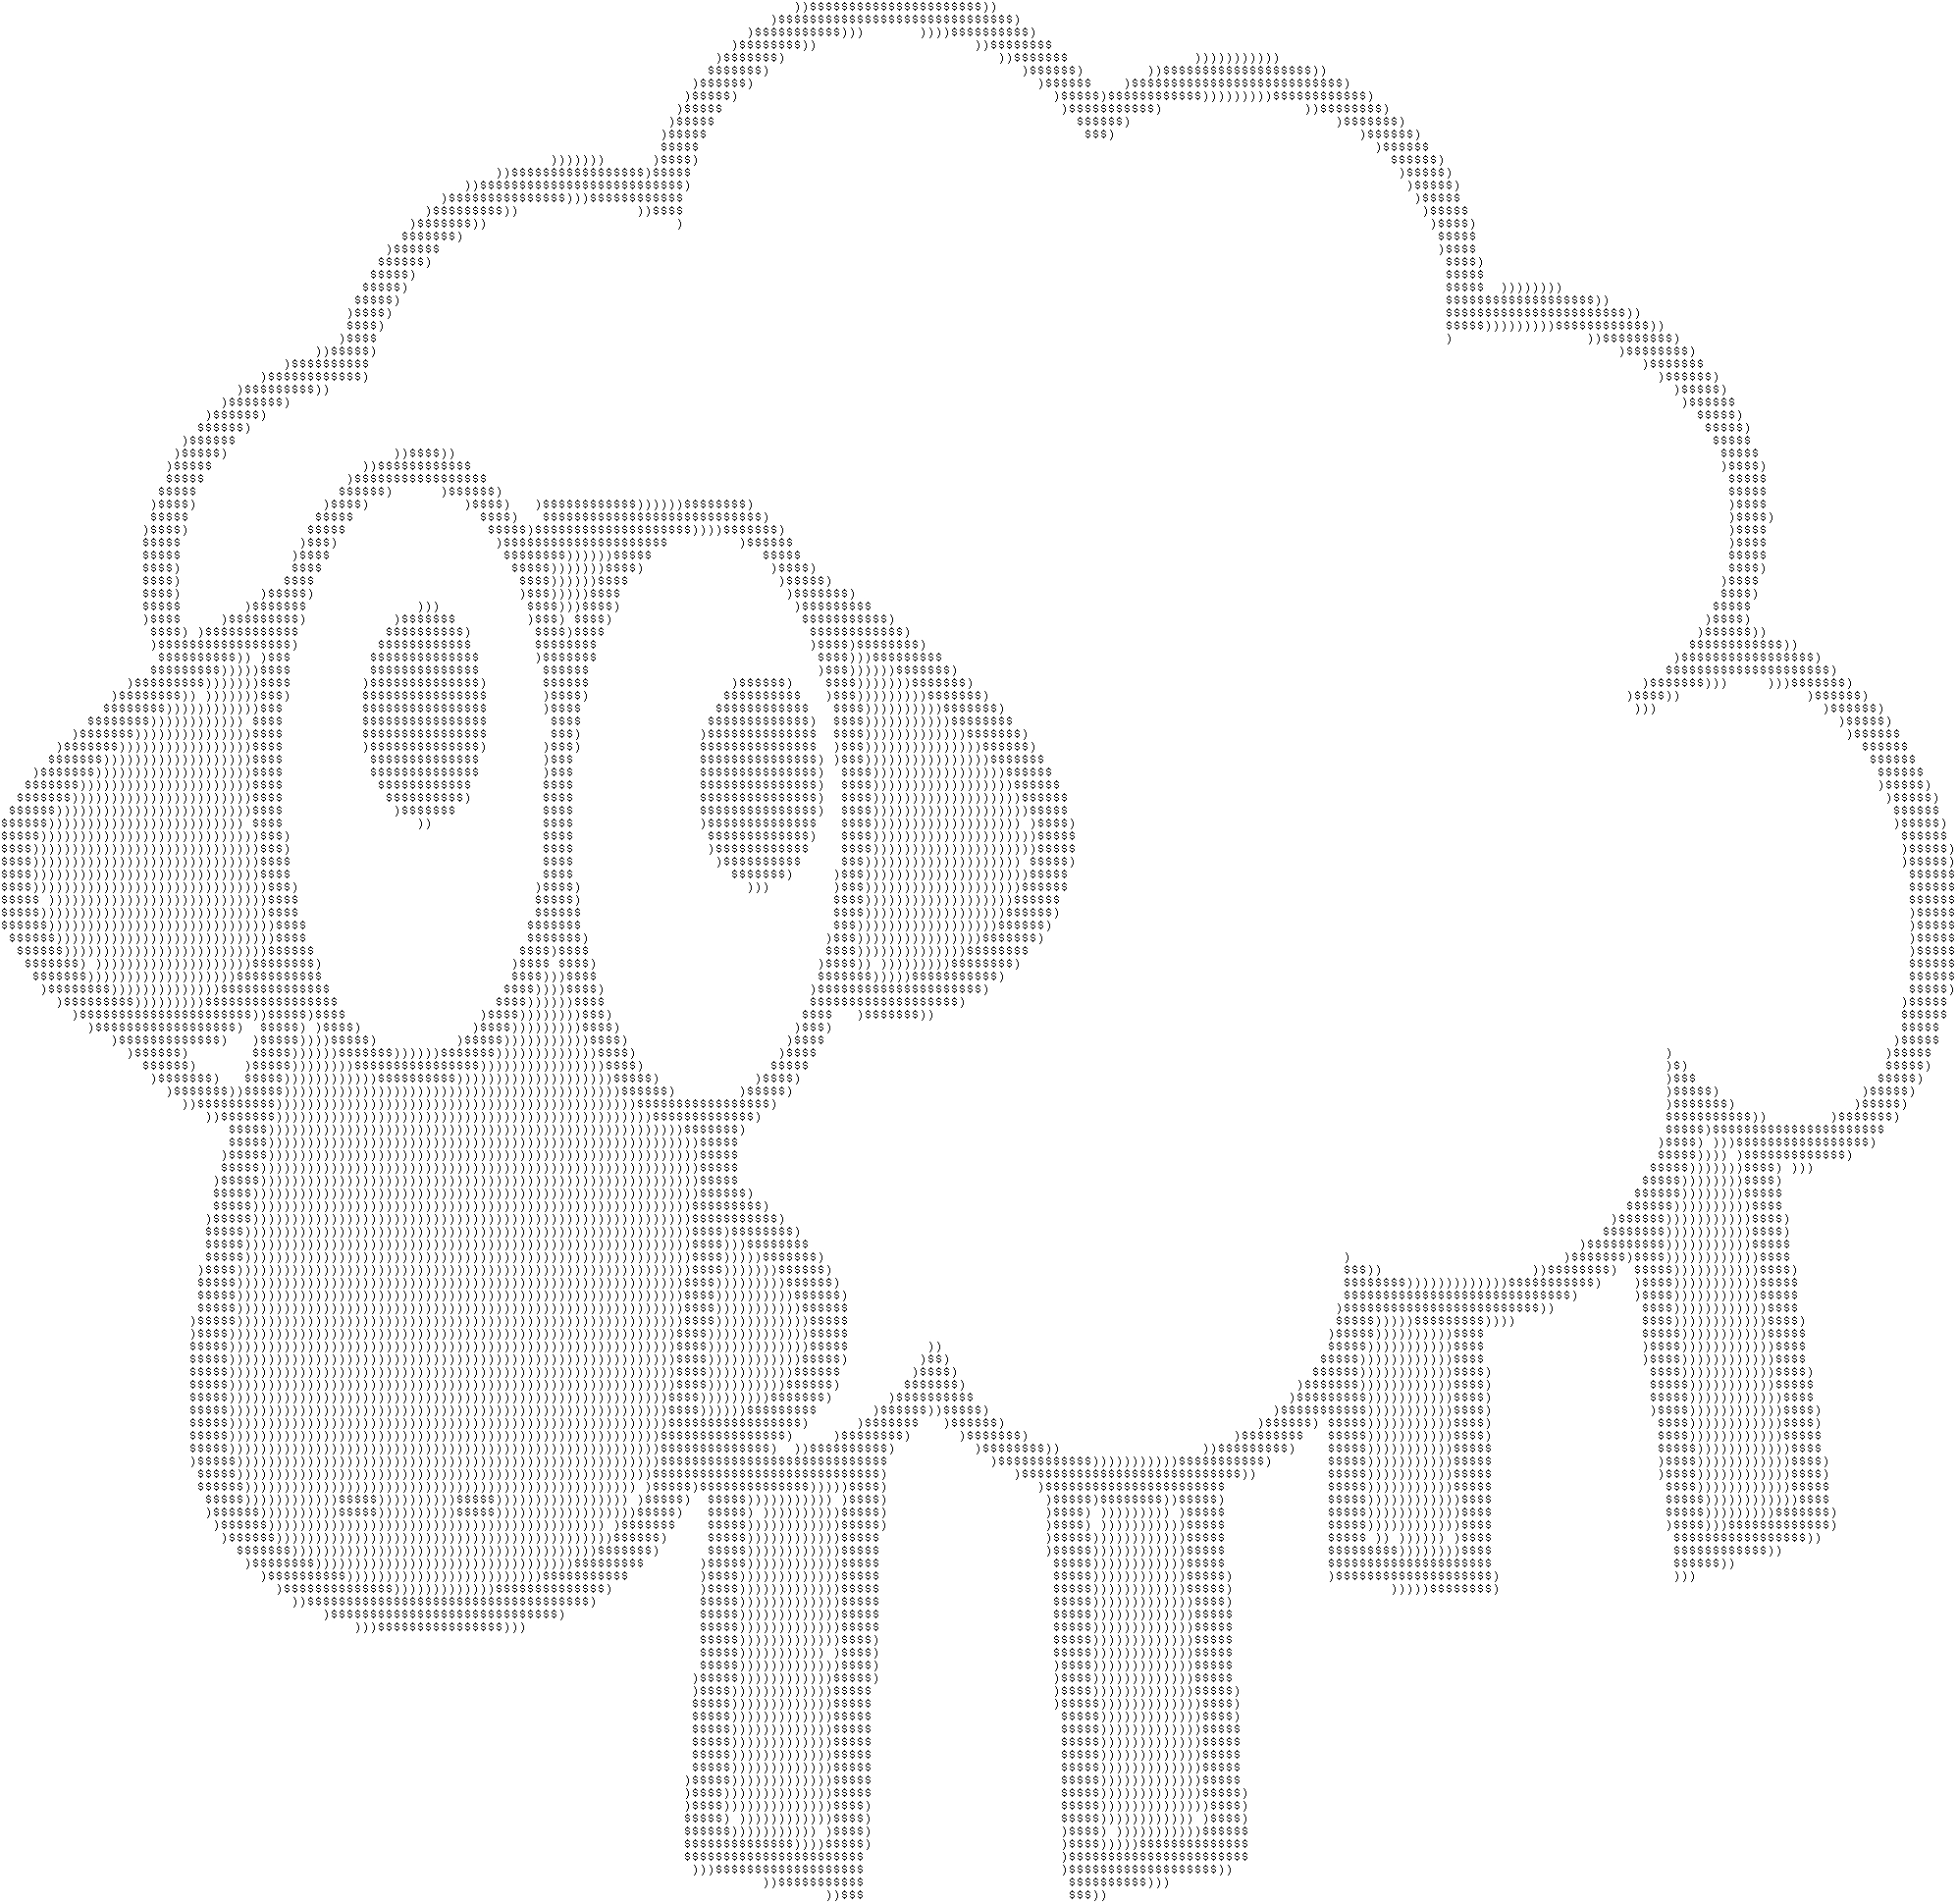

In [50]:
image_to_character(r'figures/sheep.jpg', (250, 150))
display(Image.open(r'figures/sheep_character.jpg'))

### 22. Numpy exercises
- Consider a random $10\times 2$ matrix representing cartesian coordinates, convert them to polar coordinates.

In [51]:
def cartesian_to_polar(old):
    new = np.zeros(old.shape)
    new[:, 0] = np.sqrt((old ** 2).sum(1))
    new[:, 1] = np.arctan2(old[:, 1], old[:, 0])
    return new

In [52]:
A = np.arange(20).reshape(10, 2)
A, cartesian_to_polar(A)

(array([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17],
        [18, 19]]),
 array([[ 1.        ,  1.57079633],
        [ 3.60555128,  0.98279372],
        [ 6.40312424,  0.89605538],
        [ 9.21954446,  0.86217005],
        [12.04159458,  0.84415399],
        [14.86606875,  0.83298127],
        [17.69180601,  0.82537685],
        [20.51828453,  0.81986726],
        [23.34523506,  0.81569192],
        [26.17250466,  0.81241861]]))

- Create a 2D array subclass such that $\text{Z[i, j] == Z[j, i]}$.

Create a new subclass `Symmetric` that inherits `numpy.ndarray`, and then use `super` to rewrite the `__setitem__` function so that the values can be changed symmetrically.

In [53]:
class Symmetric(np.ndarray):
    
    def __setitem__(self, index, value):
        i, j = index
        super(Symmetric, self).__setitem__((i,j), value)
        super(Symmetric, self).__setitem__((j,i), value)

def symmetric_matrix(content, shape):
    A = content.reshape(shape)
    A += A.T - np.diag(A.diagonal())
    return np.asarray(A).view(Symmetric)

In [54]:
A = symmetric_matrix(np.arange(25), (5, 5))
A
A[1, 2] = 15
A

Symmetric([[ 0,  6, 12, 18, 24],
           [ 6,  6, 18, 24, 30],
           [12, 18, 12, 30, 36],
           [18, 24, 30, 18, 42],
           [24, 30, 36, 42, 24]])

Symmetric([[ 0,  6, 12, 18, 24],
           [ 6,  6, 15, 24, 30],
           [12, 15, 12, 30, 36],
           [18, 24, 30, 18, 42],
           [24, 30, 36, 42, 24]])

- Consider 2 sets of points P0, P1 describing lines (2d) and a set of points P, how to compute distance from each point j ($\text{P[j]}$) to each line i ($\text{P0[j]}$,$\text{Pi[j]}$)?

$$distance=\frac{|(x-x_0)(y_1-y_0)-(y-y_0)(x_1-x_0)|}{\sqrt{(x_1-x_0)^2+(y_1-y_0)^2}}$$

In [55]:
def distance(P0, P1, p):
    return np.abs((p[0] - P0[:, 0]) * (P1[:, 1] - P0[:, 1]) - (p[1] - P0[:, 1]) * (P1[:, 0] - P0[:, 0])) / np.sqrt(((P1 - P0) ** 2).sum(1))

In [56]:
P0, P1, p = np.random.randn(3, 10, 2)
np.array([distance(P0,P1,p_i) for p_i in p])

array([[0.32483353, 1.92612645, 0.69976546, 0.90720964, 1.42071621,
        0.64200866, 0.13126819, 1.63098195, 0.80301274, 0.49261734],
       [0.69837399, 1.37647106, 1.68664007, 1.43935254, 0.33249645,
        0.29594313, 0.77701719, 1.41625731, 1.28244124, 0.7242145 ],
       [0.40924868, 0.15550377, 1.21510287, 0.43579388, 0.57542692,
        1.24608413, 1.9575947 , 0.14130551, 0.24103294, 1.99923189],
       [0.46727146, 1.30557318, 1.4299441 , 1.19292166, 0.57561785,
        0.2535455 , 0.82371656, 1.27352803, 1.04063477, 0.86372668],
       [0.25383539, 0.3076908 , 1.29773764, 0.5804598 , 0.52131798,
        1.13780621, 1.81271585, 0.3073693 , 0.38970676, 1.83349507],
       [1.17646293, 2.61189115, 1.28018331, 1.72980084, 0.96910983,
        1.04139017, 0.50173768, 2.44160542, 1.63747394, 0.31361048],
       [0.68123786, 2.44116836, 1.12697441, 0.33153943, 3.34123894,
        1.90468431, 0.5597756 , 1.56196622, 0.3595063 , 0.5331536 ],
       [1.07847066, 2.33971416, 1.3798168

### 23. Bilinear Interpolation

Please implement the bilinear interpolation algorithm using python. Check this for an introduction to bilinear interpolation.

In [57]:
def BilinearInterpolation(A, index):
    f1, f2 = np.floor(index).astype(int)
    d1, d2 = index - np.floor(index)
    out = A[f1][f2] * d1 * d2 + A[f1 - 1][f2 - 1] * (1 - d1) * (1 - d2) + \
    A[f1][f2 - 1] * d1 * (1 - d2) + A[f1 - 1][f2] * (1 - d1) * d2
    print(f'BilinearInterpolation(A, {index}) == {out}')

In [58]:
A = [[110, 120, 130], [210, 220, 230], [310, 320, 330]]
BilinearInterpolation(A, (1, 1))
BilinearInterpolation(A, (2.5, 2.5))
BilinearInterpolation(A, (1.2, 1.8))

BilinearInterpolation(A, (1, 1)) == 110.0
BilinearInterpolation(A, (2.5, 2.5)) == 275.0
BilinearInterpolation(A, (1.2, 1.8)) == 138.0


### 24. Cartesian product

Given an arbitrary number of vectors, build the cartesian product (every combinations of every item).

In [59]:
def Cartesian(ls):
    arrays = [np.asarray(x) for x in ls]
    idx = np.indices((len(x) for x in arrays))
    idx = idx.reshape(len(arrays), -1).T
    for i, x in enumerate(arrays):
        idx[:, i] = x[idx[:, i]]
    return idx

In [60]:
Cartesian([[1, 2, 3], [4, 5], [6, 7]])

array([[1, 4, 6],
       [1, 4, 7],
       [1, 5, 6],
       [1, 5, 7],
       [2, 4, 6],
       [2, 4, 7],
       [2, 5, 6],
       [2, 5, 7],
       [3, 4, 6],
       [3, 4, 7],
       [3, 5, 6],
       [3, 5, 7]])

### 25. Extracting a subpart of an array

Consider an arbitrary array, write a function that extract a subpart with a fixed shape and centered on a given element (pad with a fill value when necessary).

- First, get the maximum of the input shape, and pad the array to a bigger one with a fill value. For example, if the input shape is (4, 4) and the original array has a shape of (2, 2), then the array after padding will have a shape of (8, 8).
- Next, obtain the position in the new array corresponding to the input position in the original array.
- Finally, return the subpart of the new array centered on the new position.

In [61]:
def extract_subpart(A, shape, fill, position):
    pad = np.max(shape) - 1
    A_pad = np.zeros(np.array(A.shape) + pad * 2)
    A_pad[:, :] = fill
    A_pad[pad:(A_pad.shape[0] - pad), pad:(A_pad.shape[1] - pad)] = A
    position += np.array(pad)
    top = position[0] - np.array(int(shape[0] / 2))
    left = position[1] - np.array(int(shape[1] / 2))
    return A_pad[top:(top + shape[0]), left:(left + shape[1])]

In [62]:
extract_subpart(np.array([[3, 6, 8, 5, 9],
                          [4, 9, 0, 0, 9],
                          [6, 1, 4, 0, 8],
                          [9, 1, 2, 0, 9],
                          [4, 1, 7, 5, 0]]), 
                shape = (4, 4),
                fill = 0,
                position = (1,1))

array([[0., 0., 0., 0.],
       [0., 3., 6., 8.],
       [0., 4., 9., 0.],
       [0., 6., 1., 4.]])

### 26. Matrix operations

Please implement following matrix (just 2D) operations without numpy. First generate the example matrices.

In [63]:
matrix_a = [[12, 10], [3, 9]]
matrix_b = [[3, 4], [7, 4]]
matrix_c = [[11, 12, 13, 14], [21, 22, 23, 24], [31, 32, 33, 34], [41, 42, 43, 44]]
matrix_d = [[3, 0, 2], [2, 0, -2], [0, 1, 1]]

- add

In [64]:
def add(A, B):
    return [[A[i][j] + B[i][j] for j in range(len(A[0]))] for i in range(len(A))]

In [65]:
add(matrix_a, matrix_b)

[[15, 14], [10, 13]]

- subtract

In [66]:
def subtract(A, B):
    return [[A[i][j] - B[i][j] for j in range(len(A[0]))] for i in range(len(A))]

In [67]:
subtract(matrix_a, matrix_b)

[[9, 6], [-4, 5]]

- scalar multiply

In [68]:
def scalar_multiply(A, scale_factor):
    return [[A[i][j] * scale_factor for j in range(len(A[0]))] for i in range(len(A))]

In [69]:
scalar_multiply(matrix_b, 3)

[[9, 12], [21, 12]]

- multiply

In [70]:
def multiply(A, B):
    return [[sum([A[i][k] * B[k][j] for k in range(len(B))]) for j in range(len(B[0]))] for i in range(len(A))]

In [71]:
multiply(matrix_a, matrix_b)

[[106, 88], [72, 48]]

- identity

In [72]:
def identity(n):
    return [[0 if i != j else 1 for j in range(n)] for i in range(n)]

In [73]:
identity(3)

[[1, 0, 0], [0, 1, 0], [0, 0, 1]]

- transpose

In [74]:
def transpose(A):
    return [[A[j][i] for j in range(len(A[0]))] for i in range(len(A))]

In [75]:
transpose(matrix_c)

[[11, 21, 31, 41], [12, 22, 32, 42], [13, 23, 33, 43], [14, 24, 34, 44]]

- inverse: $A^{-1}=A ^ * / |A|$

In [76]:
def inverse(A):
    
    def det(mat):
        if len(mat) == 1:
            return mat[0][0]
        else:
            total = 0
            for c in range(len(mat)):
                cofactor = [[mat[i][j] for j in range(len(mat)) if j != c] for i in range(1, len(mat))]
                total += (-1) ** c * mat[0][c] * det(cofactor)
            return total

    result = [[[0] for j in range(len(A))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(A)):
            cofactor = [[A[p][q] for q in range(len(A)) if q != j] for p in range(len(A)) if p != i]
            result[j][i] = (-1) ** (i + j) * det(cofactor) / det(A)
    
    return result

In [77]:
inverse(matrix_d)

[[0.2, 0.2, 0.0], [-0.2, 0.3, 1.0], [0.2, -0.3, 0.0]]

### 27. Greatest common divisor

Use the Rolling division method to find the greatest common divisor (gcd) of two integers.

In [78]:
def GCD(a, b):
    if b == 0:
        return a
    else:
        return GCD(b, a % b)

In [79]:
print(f'GCD(3, 5) = {GCD(3, 5)}')
print(f'GCD(6, 3) = {GCD(6, 3)}')
print(f'GCD(-2, 6) = {GCD(-2, 6)}')
print(f'GCD(0, 3) = {GCD(0, 3)}')

GCD(3, 5) = 1
GCD(6, 3) = 3
GCD(-2, 6) = 2
GCD(0, 3) = 3


### 28. Find all consecutive positive number sequences whose sum is N.

e.g. 18+19...+22 = 9+10+...+16 = 100

Find all consecutive positive number sequences whose sum is 1000, and report your results.

$$
\begin{aligned}
&\frac {[start + (start + length - 1)] * length} {2} = N\\
&(2start + length - 1)*length = 2N \\
\Rightarrow\ &2start = \frac{2N}{length} - {(length - 1)},\ length < \sqrt{2N}
\end{aligned}
$$

In [80]:
def find_consecutive(N):
    print(f'All consecutive positive number sequences whose sum is {N}:')
    length = 0
    while length < int(np.sqrt(2 * N)):
        length += 1
        if (2 * N / length + 1 - length) % 2 == 0:
            start = int((2 * N / length + 1 - length) / 2)
            print(list(range(start, start + length)))

In [81]:
find_consecutive(100)
find_consecutive(1000)

All consecutive positive number sequences whose sum is 100:
[100]
[18, 19, 20, 21, 22]
[9, 10, 11, 12, 13, 14, 15, 16]
All consecutive positive number sequences whose sum is 1000:
[1000]
[198, 199, 200, 201, 202]
[55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]
[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


### 29. Password checking

A website requires the users to input username and password to register. Write a program to check the validity of password input by users. Following are the criteria for checking the password:

- At least 1 letter between \[a-z\]
- At least 1 number between \[0-9\]
- At least 1 letter between \[A-Z\]
- At least 1 character from \[$#@\]
- Minimum length of transaction password: 6
- Maximum length of transaction password: 12

Your program should accept a sequence of comma separated passwords and will check them according to the above criteria. Passwords that match the criteria are to be printed, each separated by a comma.

In [82]:
def check_password(passwords):
    password_list = passwords.split(',')
    valid_list = []
    for password in password_list:
        if 6 <= len(password) <= 12:
            letter = re.findall(r'[a-z]', password)
            number = re.findall(r'[0-9]', password)
            letter_upper = re.findall(r'[A-Z]', password)
            special = re.findall(r'[\$#@]', password)
            if letter and number and letter_upper and special:
                valid_list.append(password)
    return ','.join(valid_list)

In [83]:
passwords = 'ABd1234@1,a F1#,2w3E*,2We3345'
check_password(passwords)

'ABd1234@1'